<a href="https://colab.research.google.com/github/Alaqeelbasil/traffic-analysis/blob/main/Copy_of_Task_1_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [ ]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-
To: /content/Bus_Breakdown_and_Delays.csv
100% 34.4M/34.4M [00:00<00:00, 189MB/s]


## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [ ]:
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [ ]:
df.head(23)

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K
5,2015-2016,1225671,Special Ed AM Run,12568,P640,Heavy Traffic,24071,10/16/2015 07:20:00 AM,10/28/2015 09:38:00 AM,NaN,...,15mins,3,Yes,Yes,Yes,10/28/2015 09:38:00 AM,NaN,10/28/2015 09:38:12 AM,Running Late,School-Age
6,2015-2016,1226116,Pre-K/EI,9304,4,Heavy Traffic,C353,10/29/2015 08:09:00 AM,10/29/2015 08:11:00 AM,Bronx,...,20MIN,3,Yes,Yes,Yes,10/29/2015 08:11:00 AM,NaN,10/29/2015 08:11:28 AM,Running Late,Pre-K
7,2015-2016,1214953,Pre-K/EI,GV0365,3,Heavy Traffic,C579,09/16/2015 07:57:00 AM,09/16/2015 07:58:00 AM,Bronx,...,10MIN,4,Yes,Yes,No,09/16/2015 07:58:00 AM,NaN,09/16/2015 07:58:19 AM,Running Late,Pre-K
8,2015-2016,1215730,Special Ed AM Run,5628D,Q363,Heavy Traffic,26177,09/18/2015 07:50:00 AM,09/18/2015 07:04:00 AM,Queens,...,45MINS,0,Yes,Yes,No,09/18/2015 07:04:00 AM,NaN,09/18/2015 07:04:29 AM,Running Late,School-Age
9,2015-2016,1226326,Pre-K/EI,0003,03 AM,Other,C494,10/30/2015 06:30:00 AM,10/30/2015 06:57:00 AM,Brooklyn,...,35 Minutes,0,Yes,Yes,No,10/30/2015 06:57:00 AM,NaN,10/30/2015 06:57:13 AM,Running Late,Pre-K


In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"'{column}': {unique_values}\n")

'School_Year': ['2015-2016' '2016-2017' '2017-2018' '2019-2020']

'Busbreakdown_ID': [1224901 1225098 1215800 ... 1353044 1353045 1353046]

'Run_Type': ['Pre-K/EI' 'Special Ed AM Run' 'General Ed AM Run' 'Special Ed PM Run'
 'General Ed PM Run' 'Special Ed Field Trip' 'General Ed Field Trip' nan
 'Project Read PM Run' 'Project Read AM Run' 'Project Read Field Trip']

'Bus_No': ['811' '9302' '358' ... '0096' 'GVC510' 'K9345']

'Route_Number': ['1' '2' 'P640' ... '012' '29AM' '1409B']

'Reason': ['Other' 'Heavy Traffic' 'Flat Tire' 'Mechanical Problem'
 'Delayed by School' 'Problem Run' 'Late return from Field Trip'
 'Won`t Start' 'Weather Conditions' 'Accident' nan]

'Schools_Serviced': ['C353' 'C814' 'C195' ... 'C148' '02654, 02721,' '04377, 04454, 04658']

'Occurred_On': ['10/26/2015 08:30:00 AM' '10/27/2015 07:10:00 AM'
 '09/18/2015 07:36:00 AM' ... '05/25/2017 04:22:00 PM'
 '05/25/2017 04:27:00 PM' '05/25/2017 04:36:00 PM']

'Created_On': ['10/26/2015 08:40:00 AM' '10/27/2015 07:11:

In [ ]:
df['Number_Of_Students_On_The_Bus']= df['Number_Of_Students_On_The_Bus'].astype(int)

In [ ]:
df.shape

(147972, 21)

In [ ]:
df['Incident_Number'].isna().sum()

142340

In [ ]:
df['Incident_Number'].value_counts()

,count
Incident_Number,
x,113
X,77
e,65
90276267,24
90278844,16
...,...
90032402,1
90032400,1
90032401,1


In [ ]:
df = df.drop(['Incident_Number'], axis=1) # too much null values

In [ ]:
df.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [ ]:
df['Run_Type'].value_counts()

,count
Run_Type,
Special Ed AM Run,85990
Pre-K/EI,20951
Special Ed PM Run,17672
General Ed AM Run,17182
General Ed PM Run,4541
Special Ed Field Trip,628
General Ed Field Trip,570
Project Read PM Run,300
Project Read AM Run,47


In [ ]:
df['Boro'].value_counts()

,count
Boro,
Bronx,40995
Brooklyn,35632
Manhattan,28675
Queens,21169
Staten Island,6923
Westchester,4535
Nassau County,1970
New Jersey,887
Rockland County,491


In [ ]:
df.dropna(inplace=True)

In [ ]:
df['How_Long_Delayed'].value_counts()

,count
How_Long_Delayed,
20 MINS,5633
30 MINS,4515
30 minutes,3644
15 mins,3418
30MINS,3157
...,...
15 Mins.,1
15-30 Mins,1
ONE HOUR,1


In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"'{column}': {unique_values}\n")

'School_Year': ['2015-2016' '2016-2017' '2017-2018']

'Busbreakdown_ID': [1224901 1225098 1215800 ... 1341521 1353044 1353046]

'Run_Type': ['Pre-K/EI' 'Special Ed AM Run' 'Special Ed PM Run' 'General Ed AM Run'
 'General Ed Field Trip' 'General Ed PM Run' 'Special Ed Field Trip'
 'Project Read PM Run' 'Project Read AM Run' 'Project Read Field Trip']

'Bus_No': ['811' '9302' '358' ... '9509' '42067' 'GVC510']

'Route_Number': ['1' '2' '4' ... '9304' '29AM' '1409B']

'Reason': ['Other' 'Heavy Traffic' 'Delayed by School' 'Problem Run'
 'Late return from Field Trip' 'Mechanical Problem' 'Flat Tire'
 'Weather Conditions' 'Accident' 'Won`t Start']

'Schools_Serviced': ['C353' 'C814' 'C195' ... '03145, 05065, 03165, 03421, 03862'
 '02654, 02721,' '04377, 04454, 04658']

'Occurred_On': ['10/26/2015 08:30:00 AM' '10/27/2015 07:10:00 AM'
 '09/18/2015 07:36:00 AM' ... '03/24/2017 03:40:00 PM'
 '05/25/2017 04:22:00 PM' '05/25/2017 04:36:00 PM']

'Created_On': ['10/26/2015 08:40:00 AM' '10/27/201

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
cat = ['How_Long_Delayed','Has_Contractor_Notified_Schools','Run_Type','Bus_No','Bus_Company_Name','Route_Number','Occurred_On','Created_On','Has_Contractor_Notified_Schools','Has_Contractor_Notified_Parents','Have_You_Alerted_OPT','Informed_On','Reason','Schools_Serviced','Boro','Last_Updated_On','Breakdown_or_Running_Late','School_Age_or_PreK','School_Year']
for i in cat:
  le = LabelEncoder()
  df[i] = le.fit_transform(df[i])

In [ ]:
df['Reason']

,Reason
0,6
1,3
2,3
3,6
4,6
...,...
147966,3
147967,3
147968,3
147969,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120553 entries, 0 to 147971
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   School_Year                      120553 non-null  int64
 1   Busbreakdown_ID                  120553 non-null  int64
 2   Run_Type                         120553 non-null  int64
 3   Bus_No                           120553 non-null  int64
 4   Route_Number                     120553 non-null  int64
 5   Reason                           120553 non-null  int64
 6   Schools_Serviced                 120553 non-null  int64
 7   Occurred_On                      120553 non-null  int64
 8   Created_On                       120553 non-null  int64
 9   Boro                             120553 non-null  int64
 10  Bus_Company_Name                 120553 non-null  int64
 11  How_Long_Delayed                 120553 non-null  int64
 12  Number_Of_Students_On_The_Bus    12

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [ ]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,0,1224901,3,6920,73,6,4452,48550,52137,1,26,187,5,1,1,0,52137,95310,1,0
1,0,1225098,3,7507,73,3,4515,48811,52408,1,26,820,3,1,1,0,52408,95804,1,0
2,0,1215800,3,4314,196,3,4420,41505,44402,1,26,327,12,1,1,1,44402,80401,1,0
3,0,1215511,3,4219,196,6,4419,41394,44267,1,26,106,11,1,1,1,44267,80191,1,0
4,0,1215828,3,4225,196,6,4587,41508,44409,1,26,187,12,1,1,0,44409,80460,1,0


In [ ]:
df.tail()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
147966,1,1337850,3,905,251,3,4391,18191,19612,1,26,380,8,1,1,0,19612,38082,1,0
147967,1,1338452,3,7531,196,3,4488,18603,20045,1,26,380,7,1,1,0,20045,38960,1,0
147968,1,1341521,3,14,441,3,4502,21837,23420,1,26,606,0,1,1,0,23420,44843,1,0
147969,1,1353044,9,8001,9986,3,1278,29253,31247,1,25,679,0,1,1,1,31247,59116,1,1
147971,1,1353046,6,3262,2107,6,2865,29254,31248,2,69,1477,7,1,1,1,31248,59117,1,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [ ]:
df.dropna(inplace=True)

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [ ]:
X=df.drop('Breakdown_or_Running_Late',axis=1)
y=df['Breakdown_or_Running_Late']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
X_train.shape

(96442, 19)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units=19,input_dim = X_train.shape[1],kernel_initializer = 'uniform', activation = 'relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [ ]:
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=2, activation='relu'))

In [ ]:
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
from keras.optimizers import SGD, RMSprop, Adam, Adagrad

In [ ]:
model.compile(optimizer='Adagrad', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 19)                  │             380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 441 (1.72 KB)

 Trainable params: 441 (1.72 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [ ]:
history = model.fit(X_train, y_train, batch_size=200, epochs=4, validation_split=0.2)

Epoch 1/4
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9830 - loss: 0.6854 - val_accuracy: 0.9998 - val_loss: 0.6747
Epoch 2/4
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9999 - loss: 0.6725 - val_accuracy: 0.9998 - val_loss: 0.6668
Epoch 3/4
386/386 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9999 - loss: 0.6652 - val_accuracy: 0.9998 - val_loss: 0.6608
Epoch 4/4
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 0.6595 - val_accuracy: 0.9998 - val_loss: 0.6558


## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:
model.evaluate(X_test, y_test)

754/754 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 0.6558


[0.6557906270027161, 1.0]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [ ]:
pred = model.predict(X_test)

754/754 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

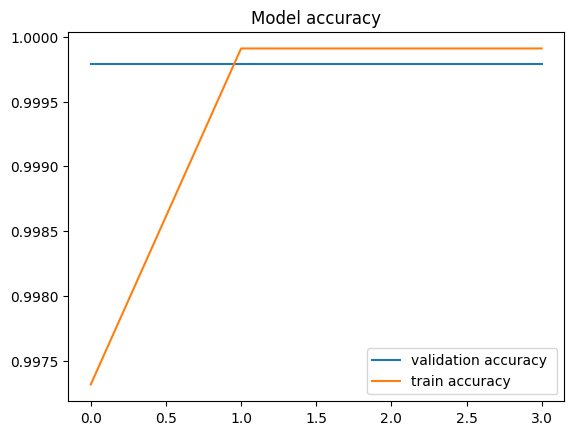

In [ ]:
plt.title('Model accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy ')
plt.plot(history.history['accuracy'], label='train accuracy')
plt.legend()
plt.show()

## Save the Model
Save the trained model for submission.

In [ ]:
model.save('ANN_model.h5')

ValueError: Unable to synchronously create dataset (name already exists)

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: